In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [143]:
#Loading Data for training and testing
train_data = pd.read_csv('train_ctrUa4K.csv')
test_data = pd.read_csv('test_lAUu6dG.csv')
sample_data = pd.read_csv('sample_submission_49d68Cx.csv')

In [144]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [145]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Preprocessing on Training Data

In [146]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [147]:
train_data.shape

(614, 13)

In [148]:
#Check Unique Values
train_data['Loan_ID'].nunique()

614

In [149]:
train_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [150]:
train_data['Gender'].unique()


array(['Male', 'Female', nan], dtype=object)

In [151]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [152]:
#Fill null values with mode
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace = True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace = True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace = True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace = True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mode()[0], inplace = True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace = True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace = True)

In [153]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [154]:
train_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [155]:
train_data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [156]:
#Label Encode the target coulmn - Loan_Status
from sklearn import preprocessing
label = preprocessing.LabelEncoder()  
train_data['Loan_Status']= label.fit_transform(train_data['Loan_Status'])

In [157]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 60.1+ KB


In [158]:
#One hot encoding
from sklearn.preprocessing import OneHotEncoder
train_data = pd.get_dummies(train_data, columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])

In [159]:
train_data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,120.0,360.0,1.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1


In [160]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Loan_Status              614 non-null    int32  
 7   Gender_Female            614 non-null    uint8  
 8   Gender_Male              614 non-null    uint8  
 9   Married_No               614 non-null    uint8  
 10  Married_Yes              614 non-null    uint8  
 11  Dependents_0             614 non-null    uint8  
 12  Dependents_1             614 non-null    uint8  
 13  Dependents_2             614 non-null    uint8  
 14  Dependents_3+            6

In [161]:
train_data['Loan_ID']= label.fit_transform(train_data['Loan_ID'])

In [162]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    int32  
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Loan_Status              614 non-null    int32  
 7   Gender_Female            614 non-null    uint8  
 8   Gender_Male              614 non-null    uint8  
 9   Married_No               614 non-null    uint8  
 10  Married_Yes              614 non-null    uint8  
 11  Dependents_0             614 non-null    uint8  
 12  Dependents_1             614 non-null    uint8  
 13  Dependents_2             614 non-null    uint8  
 14  Dependents_3+            6

Plotting Values

In [163]:
corrmatrix=train_data.corr()
corrmatrix

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,1.000000,0.016925,0.039211,0.037369,-0.033028,-0.030603,0.011773,0.028029,-0.028029,0.016013,...,0.028860,0.035754,0.017830,-0.039442,0.039442,-0.032874,0.032874,0.136850,-0.004327,-0.127902
ApplicantIncome,0.016925,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.004710,-0.058809,0.058809,-0.051708,...,0.040861,-0.034650,0.156687,0.140760,-0.140760,-0.127180,0.127180,0.015829,-0.014246,-0.000598
CoapplicantIncome,0.039211,-0.116605,1.000000,0.189723,-0.059383,0.011134,-0.059187,-0.082912,0.082912,-0.075948,...,-0.029769,0.010016,0.041491,0.062290,-0.062290,0.016100,-0.016100,0.005329,-0.027044,0.022776
LoanAmount,0.037369,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.031808,-0.106404,0.106404,-0.146212,...,0.061778,0.020367,0.152619,0.169436,-0.169436,-0.114971,0.114971,0.043570,-0.004730,-0.037259
Loan_Amount_Term,-0.033028,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.022549,0.074030,-0.074030,0.100912,...,-0.088492,-0.010609,-0.077273,0.073928,-0.073928,0.033739,-0.033739,0.034321,0.059141,-0.094279
Credit_History,-0.030603,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.540556,-0.009170,0.009170,-0.010938,...,0.009757,0.007987,-0.060473,0.073658,-0.073658,0.001550,-0.001550,-0.020906,0.035976,-0.016934
Loan_Status,0.011773,-0.004710,-0.059187,-0.031808,-0.022549,0.540556,1.000000,-0.017987,0.017987,-0.091478,...,-0.038740,0.062384,-0.026123,0.085884,-0.085884,0.003700,-0.003700,-0.100694,0.136540,-0.043621
Gender_Female,0.028029,-0.058809,-0.082912,-0.106404,0.074030,-0.009170,-0.017987,1.000000,-1.000000,0.364569,...,0.004466,-0.129953,-0.096319,0.045364,-0.045364,-0.000525,0.000525,-0.080283,0.108623,-0.034530
Gender_Male,-0.028029,0.058809,0.082912,0.106404,-0.074030,0.009170,0.017987,-1.000000,1.000000,-0.364569,...,-0.004466,0.129953,0.096319,-0.045364,0.045364,0.000525,-0.000525,0.080283,-0.108623,0.034530
Married_No,0.016013,-0.051708,-0.075948,-0.146212,0.100912,-0.010938,-0.091478,0.364569,-0.364569,1.000000,...,-0.113853,-0.249547,-0.132566,0.012304,-0.012304,0.004489,-0.004489,0.006805,-0.005845,-0.000546


<AxesSubplot:>

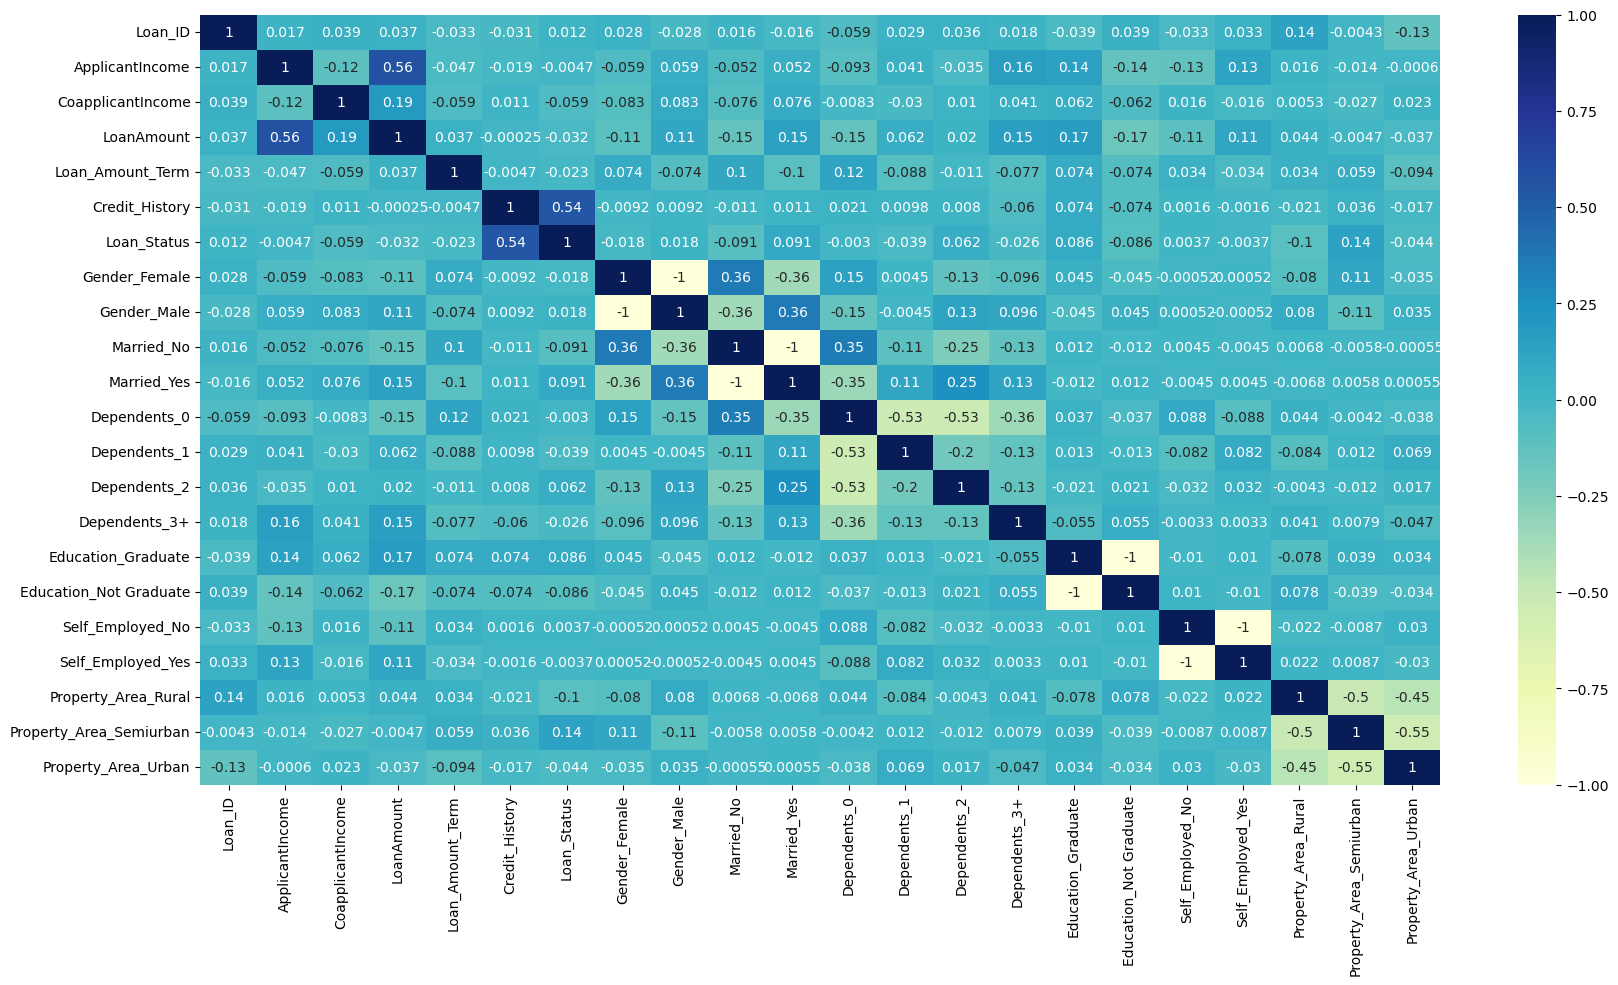

In [164]:
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')

Preprocessing Testin Data

In [165]:
test_data.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

In [166]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [167]:
#Fill null values with mode
test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace = True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace = True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace = True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mode()[0], inplace = True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace = True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace = True)

In [168]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [169]:
test_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [170]:
#One hot encoding
from sklearn.preprocessing import OneHotEncoder
test_data = pd.get_dummies(test_data, columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])

In [171]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  367 non-null    object 
 1   ApplicantIncome          367 non-null    int64  
 2   CoapplicantIncome        367 non-null    int64  
 3   LoanAmount               367 non-null    float64
 4   Loan_Amount_Term         367 non-null    float64
 5   Credit_History           367 non-null    float64
 6   Gender_Female            367 non-null    uint8  
 7   Gender_Male              367 non-null    uint8  
 8   Married_No               367 non-null    uint8  
 9   Married_Yes              367 non-null    uint8  
 10  Dependents_0             367 non-null    uint8  
 11  Dependents_1             367 non-null    uint8  
 12  Dependents_2             367 non-null    uint8  
 13  Dependents_3+            367 non-null    uint8  
 14  Education_Graduate       3

In [172]:
test_data['Loan_ID']= label.fit_transform(test_data['Loan_ID'])

In [173]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  367 non-null    int32  
 1   ApplicantIncome          367 non-null    int64  
 2   CoapplicantIncome        367 non-null    int64  
 3   LoanAmount               367 non-null    float64
 4   Loan_Amount_Term         367 non-null    float64
 5   Credit_History           367 non-null    float64
 6   Gender_Female            367 non-null    uint8  
 7   Gender_Male              367 non-null    uint8  
 8   Married_No               367 non-null    uint8  
 9   Married_Yes              367 non-null    uint8  
 10  Dependents_0             367 non-null    uint8  
 11  Dependents_1             367 non-null    uint8  
 12  Dependents_2             367 non-null    uint8  
 13  Dependents_3+            367 non-null    uint8  
 14  Education_Graduate       3

# Logistic Regression

In [174]:
x_train=train_data.drop(['Loan_Status'],axis=1)
y_train=train_data['Loan_Status']

In [175]:
from sklearn.linear_model import LogisticRegression
loan_reg = LogisticRegression(max_iter=3000)

In [176]:
loan_model=loan_reg.fit(x_train,y_train)

In [177]:
y_pred=loan_model.predict(test_data)

In [178]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

Convert the predictions to csv file

In [179]:
a = sample_data['Loan_ID']
b = []
for i in y_pred:
    if i==1:
        b.append('Y')
    else:
        b.append('N')

df = pd.DataFrame({"Loan_ID" : a, "Loan_Status" : b})
df.to_csv("test3.csv",index=False)

In [180]:
df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [181]:
df

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
